In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/patel-mark/Weekly-Data-Science-projects/refs/heads/main/Ads-Click-Through-Rate-Prediction/ad_10000records.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [3]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


### Data Preprocessing

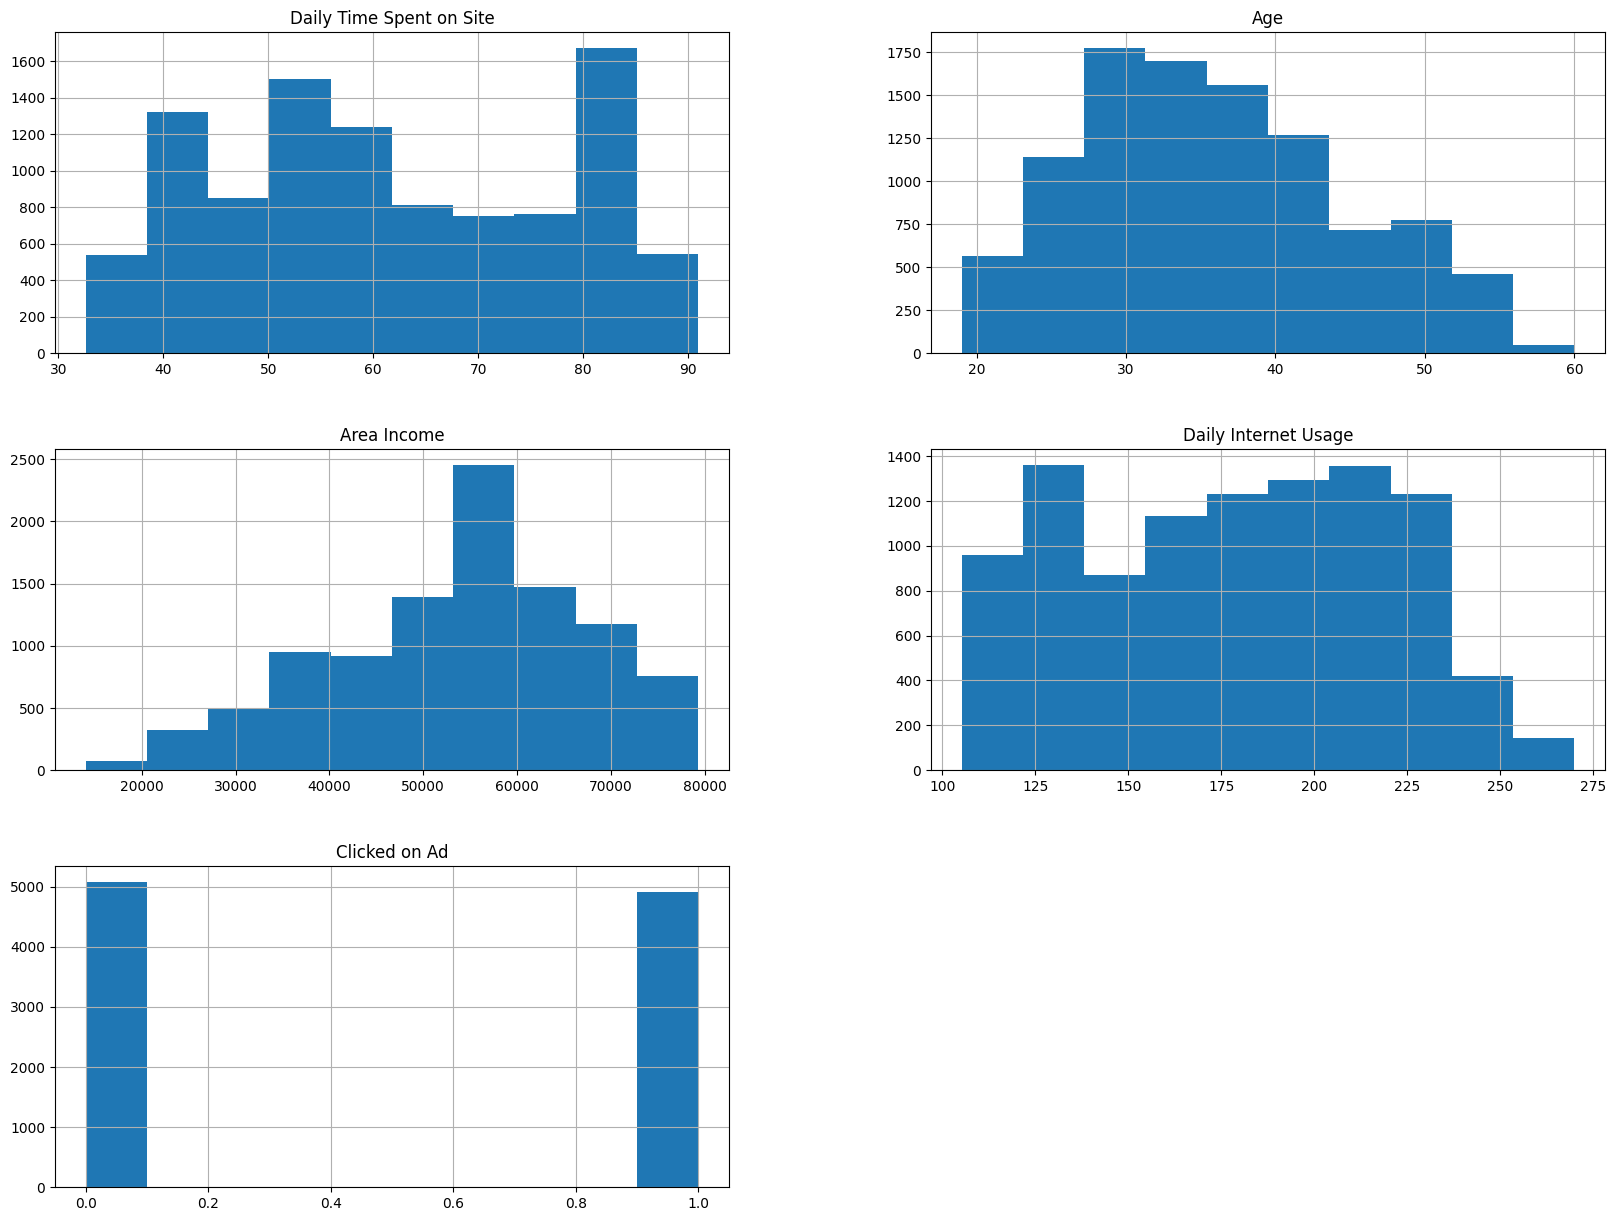

In [5]:
#checking if the data is capped or has outliers
df.hist(figsize=(20,15))
plt.show()

In [6]:
df["Timestamp"].str.split("-",expand=True)[2]

0       09 21:43:05
1       16 17:56:05
2       29 10:50:45
3       21 14:32:32
4       21 10:54:35
           ...     
9995    03 03:22:15
9996    28 12:20:15
9997    05 11:53:17
9998    04 07:07:46
9999    03 21:13:46
Name: 2, Length: 10000, dtype: object

In [7]:
df["Month"]=df["Timestamp"].str.split("-",expand=True)[1].astype(int)

In [8]:
df.drop(columns=["Timestamp"],axis=1,inplace=True)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Month
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,0,6
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,0,1
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,0,6
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,0,6
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,1,7


In [9]:
df.shape

(10000, 10)

In [10]:
num_df=df.select_dtypes(include=[np.number])

In [11]:
num_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Month
0,62.26,32.0,69481.85,172.83,0,6
1,41.73,31.0,61840.26,207.17,0,1
2,44.40,30.0,57877.15,172.83,0,6
3,59.88,28.0,56180.93,207.17,0,6
4,49.21,30.0,54324.73,201.58,1,7


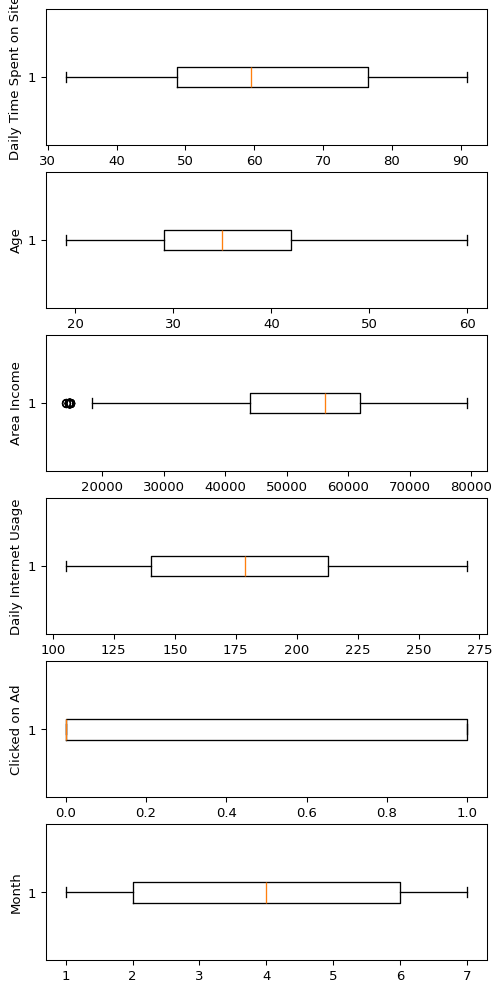

In [12]:
fig, axs=plt.subplots(len(num_df.columns), 1, dpi=95, figsize=(6,13))
# Loop through the columns and create box plots
i = 0
for col in num_df:
    axs[i].boxplot(df[col], vert=False)  # Create horizontal box plot
    axs[i].set_ylabel(col)               # Label each plot with column name
    i += 1

plt.show()

In [13]:
#Drop outliers Using zscore
from scipy.stats import zscore

numerical_col=df.select_dtypes(include=[np.number]).columns

z_score=np.abs(zscore(df[numerical_col]))

threshold=2.9

df=df[(z_score<threshold).all(axis=1)]

In [14]:
df.shape

(9966, 10)

In [15]:
num2_df=df.select_dtypes(include=[np.number])

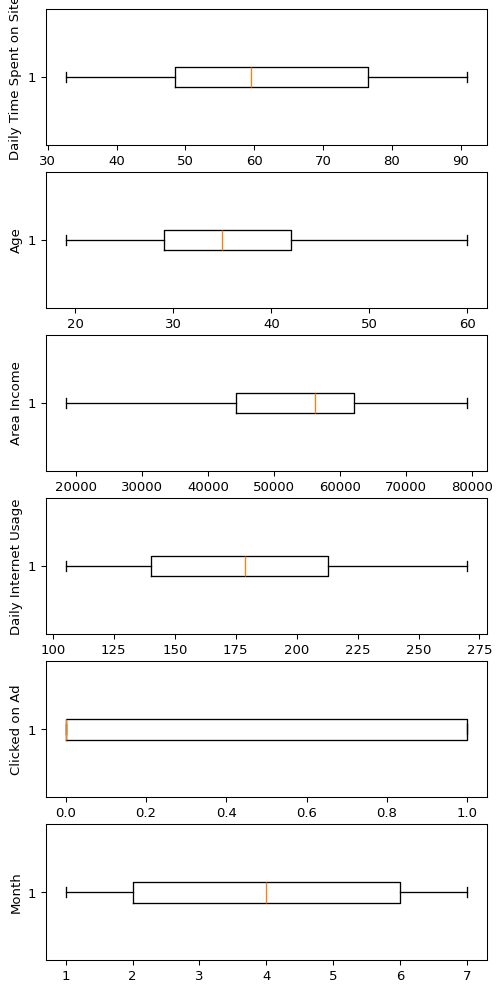

In [16]:
fig, axs=plt.subplots(len(num2_df.columns), 1, dpi=95, figsize=(6,13))
# Loop through the columns and create box plots
i = 0
for col in num2_df:
    axs[i].boxplot(df[col], vert=False)  # Create horizontal box plot
    axs[i].set_ylabel(col)               # Label each plot with column name
    i += 1

plt.show()

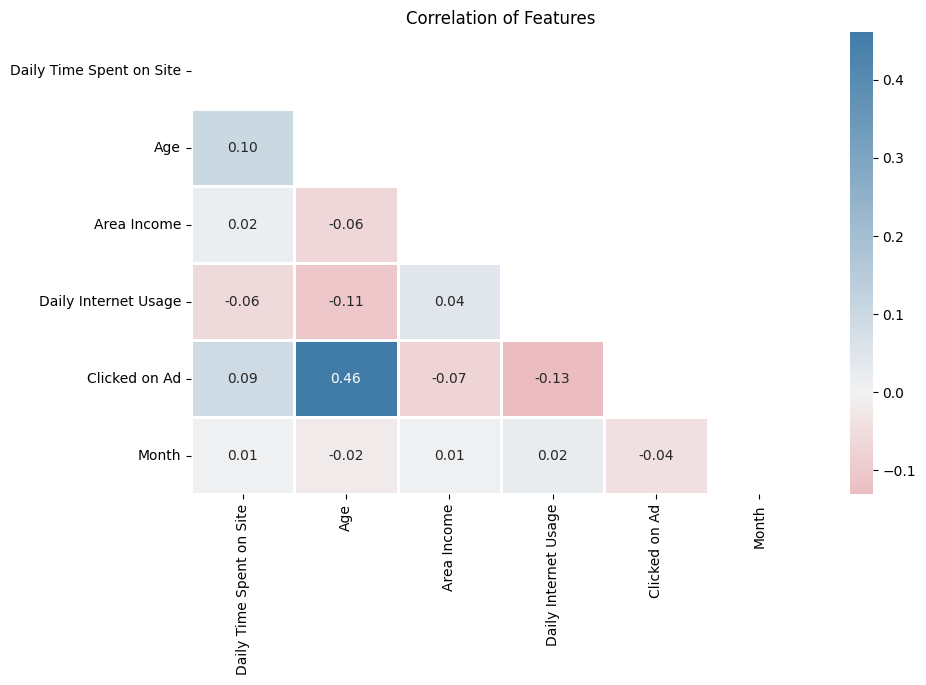

In [17]:
plt.figure(figsize=(10,6))
cmap=sns.diverging_palette(h_neg=10,
                          h_pos=240,
                          as_cmap=True)
corr=df.corr(numeric_only=True)

mask=np.triu(np.ones_like(corr,dtype=bool))

sns.heatmap(df.corr(numeric_only=True),
            mask=mask,
           center=0,
           cmap=cmap,
           linewidths=1,
           annot=True,
           fmt=".2f")
plt.title('Correlation of Features')
plt.show()

### Encoding

In [18]:
df=pd.get_dummies(df,columns=['Ad Topic Line','City','Gender','Country'])
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Month,Ad Topic Line_Adaptive 24hour Graphic Interface,Ad Topic Line_Adaptive contextually-based methodology,Ad Topic Line_Advanced 24/7 productivity,Ad Topic Line_Advanced heuristic firmware,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe
0,62.26,32.0,69481.85,172.83,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.73,31.0,61840.26,207.17,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,44.40,30.0,57877.15,172.83,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,59.88,28.0,56180.93,207.17,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,49.21,30.0,54324.73,201.58,1,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df.shape

(9966, 1293)

In [20]:
df.dtypes

Daily Time Spent on Site     float64
Age                          float64
Area Income                  float64
Daily Internet Usage         float64
Clicked on Ad                  int64
                              ...   
Country_Wallis and Futuna      uint8
Country_Western Sahara         uint8
Country_Yemen                  uint8
Country_Zambia                 uint8
Country_Zimbabwe               uint8
Length: 1293, dtype: object

### Model Building

In [21]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.metrics import classification_report,accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
X=df.drop(columns=['Clicked on Ad'])
y=df['Clicked on Ad']

X_train,X_temp,y_train,y_temp=train_test_split(X,y,
                                              random_state=1111,
                                              test_size=0.4)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,
                                          random_state=1111,
                                          test_size=0.5)